<a href="https://colab.research.google.com/github/Praxis-QR/FDS/blob/main/FinTech_3__Mutual_Funds_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![CC-BY-SA](https://licensebuttons.net/l/by-sa/3.0/88x31.png)<br>
<hr>

![alt text](https://github.com/Praxis-QR/RDWH/raw/main/images/YantraJaalBanner.png)<br>


<hr>

[Prithwis Mukerjee](http://www.linkedin.com/in/prithwis)<br>

#Mutual Fund

*   A Mutual Fund is unit of investment, managed by an Asset Management Company (AMC)
*   During a New Fund Offering (NFO), the AMC sells 'units' to individual investors at Rs 10 each
*   With the money so collected, the AMC purchases securities (equity shares, debentures, 'commercial paper' etc) either from the open market or from other sources. These are the underlying securities.
*   The value of MF units is determined by the weighted average of the value ( or price) of the underlying securities in the open market. This is called the Net Asset Value (NAV) of the fund, or more specifically, units of the fund.
*   The NAV is determined once a day by the AMC. Unlike equity shares, there is no OPEN, HIGH, LOW, CLOSE value.
*   Subsequent (or non NFO) users, can buy or sell units from the AMC at the current NAV of the fund.











## Difference between Equity Shares and MF Units


1.   After, the IPO, Equity Shares are traded between individual investors at a price determined by the supply-demand of shares in the market, or exchange. The company has nothing to do with the price, except keeping record of who owns them.
2.   Even after the NFO, individual investors buy and sell units from the AMC, not from each other. The price is determined once a day based on the price of the underlying securities and is announced by the AMC on a daily basis. The AMC buys and sells the underlying securities depending on the demand or supply of the units



##Mutual Fund Analysis with AMFI data <br>
Realtime MF data can be accessed with https://mftool.readthedocs.io/en/latest/# <br>

However we will use data that can be downloaded from AMFI  https://www.amfiindia.com/net-asset-value <br>
see the list of funds that are availale at https://drive.google.com/file/d/1TtyIIkQtIgjmfk2lE0qecNHVV2hWmp4K/view?usp=sharing <br>
NIFTY data is available at https://www1.nseindia.com/products/content/equities/indices/historical_index_data.htm

In [1]:
import numpy as np
import pandas as pd
pd.to_datetime('today').strftime('%d %B %Y')

'26 February 2023'

#Get Data

In [2]:
# Three years data, 1 Jan 2020 - 31 Dec 2022
#
!wget -q https://github.com/Praxis-QR/FDS/raw/main/data/fintech/Birla.xlsx 
!wget -q https://github.com/Praxis-QR/FDS/raw/main/data/fintech/Canara.xlsx
!wget -q https://github.com/Praxis-QR/FDS/raw/main/data/fintech/icici.xlsx
!wget -q https://raw.githubusercontent.com/Praxis-QR/FDS/main/data/fintech/NIFTY_50_Data_2020-2022.csv

##NIFTY Data
NIFTY data is available at https://www1.nseindia.com/products/content/equities/indices/historical_index_data.htm

In [3]:
dfNIFTY_ = pd.read_csv('/content/NIFTY_50_Data_2020-2022.csv', header=0)
dfNIFTY = dfNIFTY_.loc[::-1]                                                # reverse the order of rows
dfNIFTY['Date'] =  pd.to_datetime(dfNIFTY['Date'], format='%d %b %Y')       # set the Date column to date formatt
                                                                            # alternate formats https://docs.python.org/3.7/library/datetime.html#strftime-strptime-behavior
dfNIFTY.set_index('Date', inplace =True)                                    #
dfNIFTY.drop(['Open','High','Low'], axis = 1, inplace =True)                # Drop three columns
dfNIFTY = dfNIFTY.rename(columns ={'Close':'NIFTY'})                        # Rename CLOSE column to NIFTY
dfNIFTY.head()


,NIFTY
Date,
2020-01-01,12182.50
2020-01-02,12282.20
2020-01-03,12226.65
2020-01-06,11993.05
2020-01-07,12052.95


In [4]:
#print(dfNIFTY)
dfNIFTY.count()

NIFTY    748
dtype: int64

##Fund NAV Data

Mutual Fund Data <br>
From this we choose the following <br>


1.   Aditya Birla Sun Life Frontline Equity Fund-Growth
2.   Canara Robeco Bluechip Equity Fund - Regular Plan - Growth
3.   ICICI Prudential - Nifty  Index-Regular Plan

and download the current data 

In [5]:
# Read xlsx data into dataframe
def AMFIdata(fileName, fundName):
    df = pd.read_excel(fileName, header=4)                                      # convert xlsx file into dataframe, ignore first four lines
    df.drop(['Repurchase Price','Sale Price'], axis = 1, inplace =True)         #  drop two unnecessary columns
    df = df.rename(columns ={'NAV date':'Date','Net Asset Value':fundName })    # rename column with fund name for comparisons later
    df['Date'] =  pd.to_datetime(df['Date'])                                    # change the date from string to date-time format       
    df.drop_duplicates(inplace = True)                                          # remove duplicate data from the set
    df.set_index('Date', inplace =True)                                         # make the Date column as the index 
    return df                                                                   # return the dataframe

In [6]:
dfBirla = AMFIdata('Birla.xlsx','Birla')
dfICICI = AMFIdata('icici.xlsx','ICICI')
dfCanara = AMFIdata('Canara.xlsx','Canara')
dfBirla.count(), dfICICI.count(), dfCanara.count()

(Birla    744
 dtype: int64, ICICI    744
 dtype: int64, Canara    744
 dtype: int64)

In [7]:
dfFunds = pd.merge(dfCanara,pd.merge(dfBirla,dfICICI,on='Date'),on='Date')
dfFunds.head()

,Canara,Birla,ICICI
Date,,,
2020-01-01,29.16,248.12,121.4474
2020-01-02,29.34,250.23,122.4356
2020-01-03,29.24,249.32,121.8871
2020-01-06,28.76,244.38,119.5867
2020-01-07,28.93,245.27,120.1723


## Merge NIFTY with Funds

In [8]:
df = pd.merge(dfNIFTY,dfFunds,on='Date')
df.head()

,NIFTY,Canara,Birla,ICICI
Date,,,,
2020-01-01,12182.50,29.16,248.12,121.4474
2020-01-02,12282.20,29.34,250.23,122.4356
2020-01-03,12226.65,29.24,249.32,121.8871
2020-01-06,11993.05,28.76,244.38,119.5867
2020-01-07,12052.95,28.93,245.27,120.1723


In [9]:
df.count()

NIFTY     744
Canara    744
Birla     744
ICICI     744
dtype: int64

In [ ]:
#duplicate = dfBirla[dfBirla.duplicated('Date',keep=False)]
#print(duplicate)

##Charts

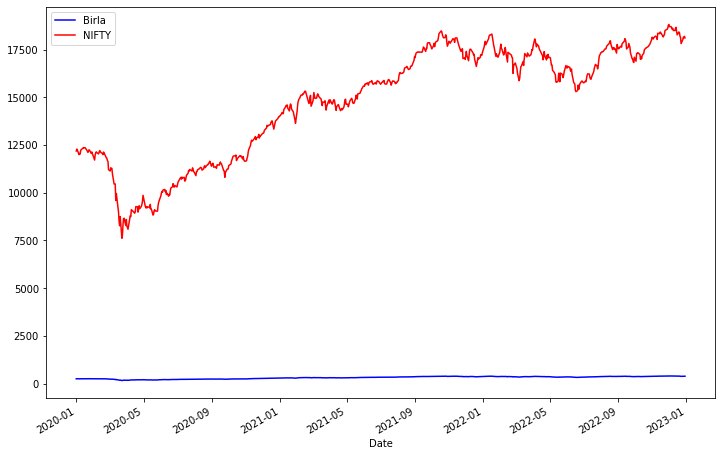

In [ ]:
# Plotting directly from DataFrames with Pandas
df.plot(y=['Birla','NIFTY'],kind='line', color=['blue','red'], figsize=(12,8));



### Scaled 

In [ ]:
dfCopy = df.copy()
dfCopy[]

,NIFTY,Canara,Birla,ICICI
Date,,,,
2020-01-01,12182.50,29.16,248.12,121.4474
2020-01-02,12282.20,29.34,250.23,122.4356
2020-01-03,12226.65,29.24,249.32,121.8871
2020-01-06,11993.05,28.76,244.38,119.5867
2020-01-07,12052.95,28.93,245.27,120.1723
...,...,...,...,...
2022-12-26,18014.60,46.82,381.00,184.2698
2022-12-27,18132.30,47.06,383.12,185.4708
2022-12-28,18122.50,47.03,382.86,185.3692


In [ ]:
#we need to scale the data
dfCopy['Adj NIFTY'] = dfCopy['NIFTY']/dfCopy.iloc[0]['NIFTY']
dfCopy['Adj Canara'] = dfCopy['Canara']/dfCopy.iloc[0]['Canara']
dfCopy['Adj Birla'] = dfCopy['Birla']/dfCopy.iloc[0]['Birla']
dfCopy['Adj ICICI'] = dfCopy['ICICI']/dfCopy.iloc[0]['ICICI']
dfCopy.head()

,NIFTY,Canara,Birla,ICICI,Adj NIFTY,Adj Canara,Adj Birla,Adj ICICI
Date,,,,,,,,
2020-01-01,12182.50,29.16,248.12,121.4474,1.000000,1.000000,1.000000,1.000000
2020-01-02,12282.20,29.34,250.23,122.4356,1.008184,1.006173,1.008504,1.008137
2020-01-03,12226.65,29.24,249.32,121.8871,1.003624,1.002743,1.004836,1.003620
2020-01-06,11993.05,28.76,244.38,119.5867,0.984449,0.986283,0.984927,0.984679
2020-01-07,12052.95,28.93,245.27,120.1723,0.989366,0.992112,0.988514,0.989501


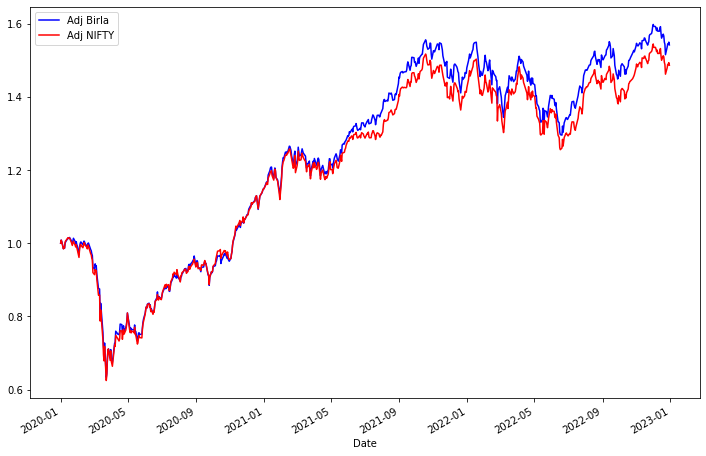

In [ ]:
# Plotting directly from DataFrames with Pandas
dfCopy.plot(y=['Adj Birla','Adj NIFTY'], kind='line', color=['blue','red'],figsize=(12,8));



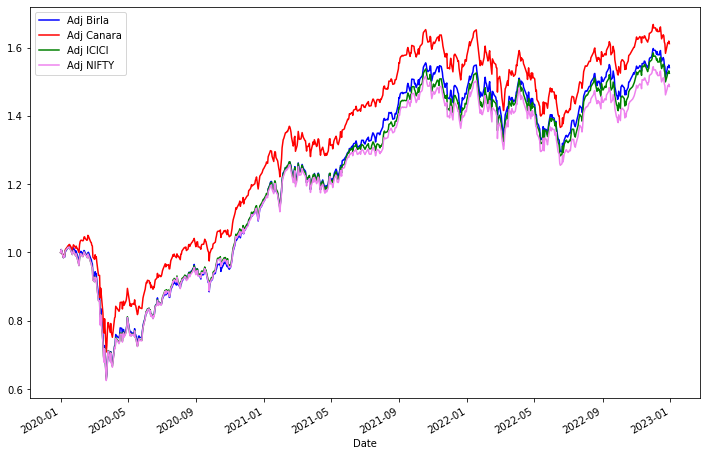

In [ ]:
# Plotting directly from DataFrames with Pandas
dfCopy.plot(y=['Adj Birla','Adj Canara','Adj ICICI','Adj NIFTY'], kind='line', color=['blue','red','green','violet'],figsize=(12,8));

In [ ]:
df.head()

,NIFTY,Canara,Birla,ICICI
Date,,,,
2020-01-01,12182.50,29.16,248.12,121.4474
2020-01-02,12282.20,29.34,250.23,122.4356
2020-01-03,12226.65,29.24,249.32,121.8871
2020-01-06,11993.05,28.76,244.38,119.5867
2020-01-07,12052.95,28.93,245.27,120.1723


#Tale of TWO returns
LogReturns and Simple Returns <br>
https://www.portfolioprobe.com/2010/10/04/a-tale-of-two-returns/ <br>
Why use LogReturns ? https://lucaslouca.com/Why-Use-Logarithmic-Returns-In-Time-Series-Modelling/

##Log Returns

In [10]:
#Daily Log Returns
dailyLogReturns = df.pct_change().apply(lambda x: np.log(1+x))
dailyLogReturns.head()

,NIFTY,Canara,Birla,ICICI
Date,,,,
2020-01-01,NaN,NaN,NaN,NaN
2020-01-02,0.008151,0.006154,0.008468,0.008104
2020-01-03,-0.004533,-0.003414,-0.003643,-0.004490
2020-01-06,-0.019291,-0.016552,-0.020013,-0.019054
2020-01-07,0.004982,0.005894,0.003635,0.004885


In [11]:
dailyLogReturns['Year'] = dailyLogReturns.index.year
dailyLogReturns.head()

,NIFTY,Canara,Birla,ICICI,Year
Date,,,,,
2020-01-01,NaN,NaN,NaN,NaN,2020
2020-01-02,0.008151,0.006154,0.008468,0.008104,2020
2020-01-03,-0.004533,-0.003414,-0.003643,-0.004490,2020
2020-01-06,-0.019291,-0.016552,-0.020013,-0.019054,2020
2020-01-07,0.004982,0.005894,0.003635,0.004885,2020


In [12]:
# logReturns are additive!
annualLogReturns = dailyLogReturns.groupby('Year').sum()
annualLogReturns

,NIFTY,Canara,Birla,ICICI
Year,,,,
2020,0.137752,0.219571,0.138647,0.144292
2021,0.216073,0.235185,0.252748,0.225047
2022,0.042379,0.022594,0.041500,0.052557


In [13]:
#Calculate Simple Returns from Log Returns
annualLogReturns['NIFTY_SR'] = np.exp(annualLogReturns['NIFTY']) - 1
annualLogReturns['Canara_SR'] = np.exp(annualLogReturns['Canara']) - 1
annualLogReturns['Birla_SR'] = np.exp(annualLogReturns['Birla']) - 1
annualLogReturns['ICICI_SR'] = np.exp(annualLogReturns['ICICI']) - 1
annualLogReturns

,NIFTY,Canara,Birla,ICICI,NIFTY_SR,Canara_SR,Birla_SR,ICICI_SR
Year,,,,,,,,
2020,0.137752,0.219571,0.138647,0.144292,0.147691,0.245542,0.148718,0.155222
2021,0.216073,0.235185,0.252748,0.225047,0.241193,0.265143,0.287559,0.252382
2022,0.042379,0.022594,0.041500,0.052557,0.043290,0.022851,0.042373,0.053962


## Simple Returns

In [14]:
#Year End Prices
df.resample('Y').last()

,NIFTY,Canara,Birla,ICICI
Date,,,,
2020-12-31,13981.75,36.32,285.02,140.2987
2021-12-31,17354.05,45.95,366.98,175.7075
2022-12-31,18105.30,47.00,382.53,185.1891


In [15]:
annualSimpleReturns = df.resample('Y').last().pct_change()
annualSimpleReturns
#Compare with Simple Returns computed from Log Returns

,NIFTY,Canara,Birla,ICICI
Date,,,,
2020-12-31,NaN,NaN,NaN,NaN
2021-12-31,0.241193,0.265143,0.287559,0.252382
2022-12-31,0.043290,0.022851,0.042373,0.053962


In [16]:
#Compute Log Returns from Simple Returns
annualSimpleReturns['NIFTY_LR'] = np.log(annualSimpleReturns['NIFTY']+1)
annualSimpleReturns['Canara_LR'] = np.log(annualSimpleReturns['Canara']+1)
annualSimpleReturns['Birla_LR'] = np.log(annualSimpleReturns['Birla']+1)
annualSimpleReturns['ICICI_LR'] = np.log(annualSimpleReturns['ICICI']+1)
annualSimpleReturns
#Compare with original set of Log Returns

,NIFTY,Canara,Birla,ICICI,NIFTY_LR,Canara_LR,Birla_LR,ICICI_LR
Date,,,,,,,,
2020-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-31,0.241193,0.265143,0.287559,0.252382,0.216073,0.235185,0.252748,0.225047
2022-12-31,0.043290,0.022851,0.042373,0.053962,0.042379,0.022594,0.041500,0.052557


#Ratios
Can be applied to any security

*   For Mutual Funds, NAV is used
*   For Equity Shares, CLOSE price can be used



### Daily Return

In [17]:
#Calculate the Daily Returns

#dfReturns = df[['NIFTY','Birla','Canara','ICICI']].pct_change()                                # Simple Returns
dfReturns = df[['NIFTY','Birla','Canara','ICICI']].pct_change().apply(lambda x: np.log(1+x))    # Log Returns
dfReturns.head()

,NIFTY,Birla,Canara,ICICI
Date,,,,
2020-01-01,NaN,NaN,NaN,NaN
2020-01-02,0.008151,0.008468,0.006154,0.008104
2020-01-03,-0.004533,-0.003643,-0.003414,-0.004490
2020-01-06,-0.019291,-0.020013,-0.016552,-0.019054
2020-01-07,0.004982,0.003635,0.005894,0.004885


In [18]:
# Average of Daily Returns
dfMeans = dfReturns.mean().to_frame()
dfMeans.columns=['Mean']
dfMeans

,Mean
NIFTY,0.000533
Birla,0.000583
Canara,0.000642
ICICI,0.000568


In [19]:
#this is std of daily returns
#do we need to convert this to standard deviation of annual returns
dfstdev = dfReturns.std().to_frame()
dfstdev.columns = ['stdev']
dfstdev

,stdev
NIFTY,0.014391
Birla,0.013523
Canara,0.012863
ICICI,0.014252


In [20]:
dfcomparison = dfMeans.merge(dfstdev,left_index=True,right_index=True)
dfcomparison

,Mean,stdev
NIFTY,0.000533,0.014391
Birla,0.000583,0.013523
Canara,0.000642,0.012863
ICICI,0.000568,0.014252


In [21]:
#Calculate Covariance of Returns
dfrcov = dfReturns.cov()
dfrcov

,NIFTY,Birla,Canara,ICICI
NIFTY,0.000207,0.000192,0.000183,0.000205
Birla,0.000192,0.000183,0.000172,0.000190
Canara,0.000183,0.000172,0.000165,0.000181
ICICI,0.000205,0.000190,0.000181,0.000203


In [22]:
dfrcov['NIFTY']

NIFTY     0.000207
Birla     0.000192
Canara    0.000183
ICICI     0.000205
Name: NIFTY, dtype: float64

In [23]:
# Volatility of NIFTY
dfrcov['NIFTY']['NIFTY']

0.00020709776241476514

### Beta
What is the [beta](https://www.investopedia.com/investing/beta-know-risk/#:~:text=Beta%20is%20a%20concept%20that,a%20stock%20with%20lower%20volatility) of a security? <br>

beta = covariance of price with reference / variance of reference

In [24]:
dfbeta = pd.DataFrame(dfrcov['NIFTY']/dfrcov['NIFTY']['NIFTY'])
dfbeta.columns = ['beta']
dfbeta

,beta
NIFTY,1.000000
Birla,0.928632
Canara,0.884804
ICICI,0.990169


In [25]:
dfcomparison = dfcomparison.merge(dfbeta,left_index=True,right_index=True)
dfcomparison

,Mean,stdev,beta
NIFTY,0.000533,0.014391,1.000000
Birla,0.000583,0.013523,0.928632
Canara,0.000642,0.012863,0.884804
ICICI,0.000568,0.014252,0.990169


### Sharpe Ratio
What is [Sharpe Ratio](https://www.investopedia.com/terms/s/sharperatio.asp)? 

In [26]:
# Risk Free Return
rFree = 0.05/252  # daily return, multiply by 252 to get annual return ~ 5%

dfcomparison['Sharpe'] = (dfcomparison['Mean']-rFree)/dfcomparison['stdev']
dfcomparison

,Mean,stdev,beta,Sharpe
NIFTY,0.000533,0.014391,1.000000,0.023267
Birla,0.000583,0.013523,0.928632,0.028412
Canara,0.000642,0.012863,0.884804,0.034521
ICICI,0.000568,0.014252,0.990169,0.025921


###Treynor Ratio
What is [Treynor Ratio](https://www.investopedia.com/terms/t/treynorratio.asp) ?

In [27]:
dfcomparison['Treynor'] = (dfcomparison['Mean']-rFree)/dfcomparison['beta']
dfcomparison

,Mean,stdev,beta,Sharpe,Treynor
NIFTY,0.000533,0.014391,1.000000,0.023267,0.000335
Birla,0.000583,0.013523,0.928632,0.028412,0.000414
Canara,0.000642,0.012863,0.884804,0.034521,0.000502
ICICI,0.000568,0.014252,0.990169,0.025921,0.000373


### Alpha
What is [Jenson's Alpha](https://www.investopedia.com/terms/j/jensensmeasure.asp) ?

In [28]:
rFree = 0.05/252  # daily return, multiply by 252 to get annual return ~ 5%
Rm = dfcomparison['Mean']['NIFTY']    # the realized return of the appropriate market index
Rm

0.0005332492831131701

In [29]:
#Jensons Alpha 
dfcomparison['alpha'] = dfcomparison['Mean'] - rFree + dfcomparison['beta']*(Rm-rFree)
dfcomparison

,Mean,stdev,beta,Sharpe,Treynor,alpha
NIFTY,0.000533,0.014391,1.000000,0.023267,0.000335,0.000670
Birla,0.000583,0.013523,0.928632,0.028412,0.000414,0.000695
Canara,0.000642,0.012863,0.884804,0.034521,0.000502,0.000740
ICICI,0.000568,0.014252,0.990169,0.025921,0.000373,0.000701


### Annualised Return

In [30]:
# Annualised Return
TradingDays = 252
dfcomparison['Annual Return'] = dfcomparison['Mean']*TradingDays
dfcomparison

,Mean,stdev,beta,Sharpe,Treynor,alpha,Annual Return
NIFTY,0.000533,0.014391,1.000000,0.023267,0.000335,0.000670,0.134379
Birla,0.000583,0.013523,0.928632,0.028412,0.000414,0.000695,0.146823
Canara,0.000642,0.012863,0.884804,0.034521,0.000502,0.000740,0.161901
ICICI,0.000568,0.014252,0.990169,0.025921,0.000373,0.000701,0.143093


#Chronobooks <br>
Two science fiction novels by Prithwis Mukerjee. A dystopian Earth. A technocratic society managed by artificial intelligence. Escape and epiphany on Mars. Can man and machine, carbon and silicon explore and escape into other dimensions of existence? An Indic perspective rooted in Advaita Vedanta and the Divine Feminine.  [More information](http://bit.ly/chronobooks) <br>
![alt text](https://github.com/Praxis-QR/RDWH/raw/main/images/CTCYFooter-1.png)